**Задание 1. EDA**
Проведите разведывательный анализ данных (EDA).

Задайте не менее 6 вопросов к данным и постарайтесь ответить на них, используя визуализацию.

Изобразите матрицу корреляций для нахождения взаимосвязей.

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as st
from datetime import datetime

In [297]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding = 'cp1252')
pd.set_option('display.float_format', '{:,.0f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,"228,000,000,000",Music,T-Series,20082,India,IN,Music,1,1,1,"2,258,000,000","564,600","9,000,000","6,800,000","108,400,000","2,000,000","2,006",Mar,13,28,"1,366,417,754",5,"471,031,528",21,79
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,"4,055,159","7,670","7,423",12,0,0,0,1,NaN,"2,006",Mar,5,88,"328,239,523",15,"270,663,028",37,-96
2,3,MrBeast,166000000,"28,368,841,870",Entertainment,MrBeast,741,United States,US,Entertainment,48,1,1,"1,348,000,000","337,000","5,400,000","4,000,000","64,700,000","8,000,000","2,012",Feb,20,88,"328,239,523",15,"270,663,028",37,-96
3,4,Cocomelon - Nursery Rhymes,162000000,"164,000,000,000",Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2,2,1,"1,975,000,000","493,800","7,900,000","5,900,000","94,800,000","1,000,000","2,006",Sep,1,88,"328,239,523",15,"270,663,028",37,-96
4,5,SET India,159000000,"148,000,000,000",Shows,SET India,116536,India,IN,Entertainment,3,2,2,"1,824,000,000","455,900","7,300,000","5,500,000","87,500,000","1,000,000","2,006",Sep,20,28,"1,366,417,754",5,"471,031,528",21,79


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [150]:
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

Типы данных для всех столбцов определены верно.

Пропуски значений:
category - нечисловые данные, пропущено не особо много, но лучше заменить пропуски на "Unknown"

Country и Abbreviation - не числовые данные, пропущено значимое кол-во данный, лучше замнеить пропуски на "Unknown"

channel_type - нечисловые данные, пропущено не особо много, но лучше заменить пропуски на "Unknown"

video_views_rank - числовый данные, пропуск всего 1, можно удалить всю строку с данными

country_rank - числовые данные, основанные на кол-ве подписчиков в стране, пропусков достаточно много, необходимо заполнить данные с помощью медианы

channel_type_rank - числовые данные, заполненные на основе какого-то рейтинга, пропусков не так много, но их стоит заполнить, например, модианой

video_views_for_the_last_30_days - числовые данные, пропущено не очень много, но стоит заполнить пропуски медианным значением

subscribers_for_last_30_days - очень много пропусков, данные числовые, будем заполнять медианой

created_year, created_month, created_date - числовые временнные данные, которые пропущены в одном и том же месте, их немного, поэтому можем удалить

Gross tertiary education enrollment (%), Population, Unemployment rate, Urban_population - числовые невременные данные, пропусков достаточно много, судя по матрице, они все в одинаковых местах в этих столбцах, т.к. по матрице (и при изучении таблицы) скорее всего эти пропуски совпадают с пропусами в столбцах Country и Abbreviation, и мы не сможем косвенными вычислениями заполнить пропуски, то заполним их параметром, который будет наиболее усточивы к выбросам - медианой

Latitude и Longitude - числовые данные, пропусков много, они сопадают с пропусками в последних 4-х столбцах и со столбцами Country и Abbreviation. Так как наши столбцы означают геолокацию, а у нас нет ни единой информации о локации в связи с пропусками, то мы просто оставим пропуски без изменений и не будем их заполнять.

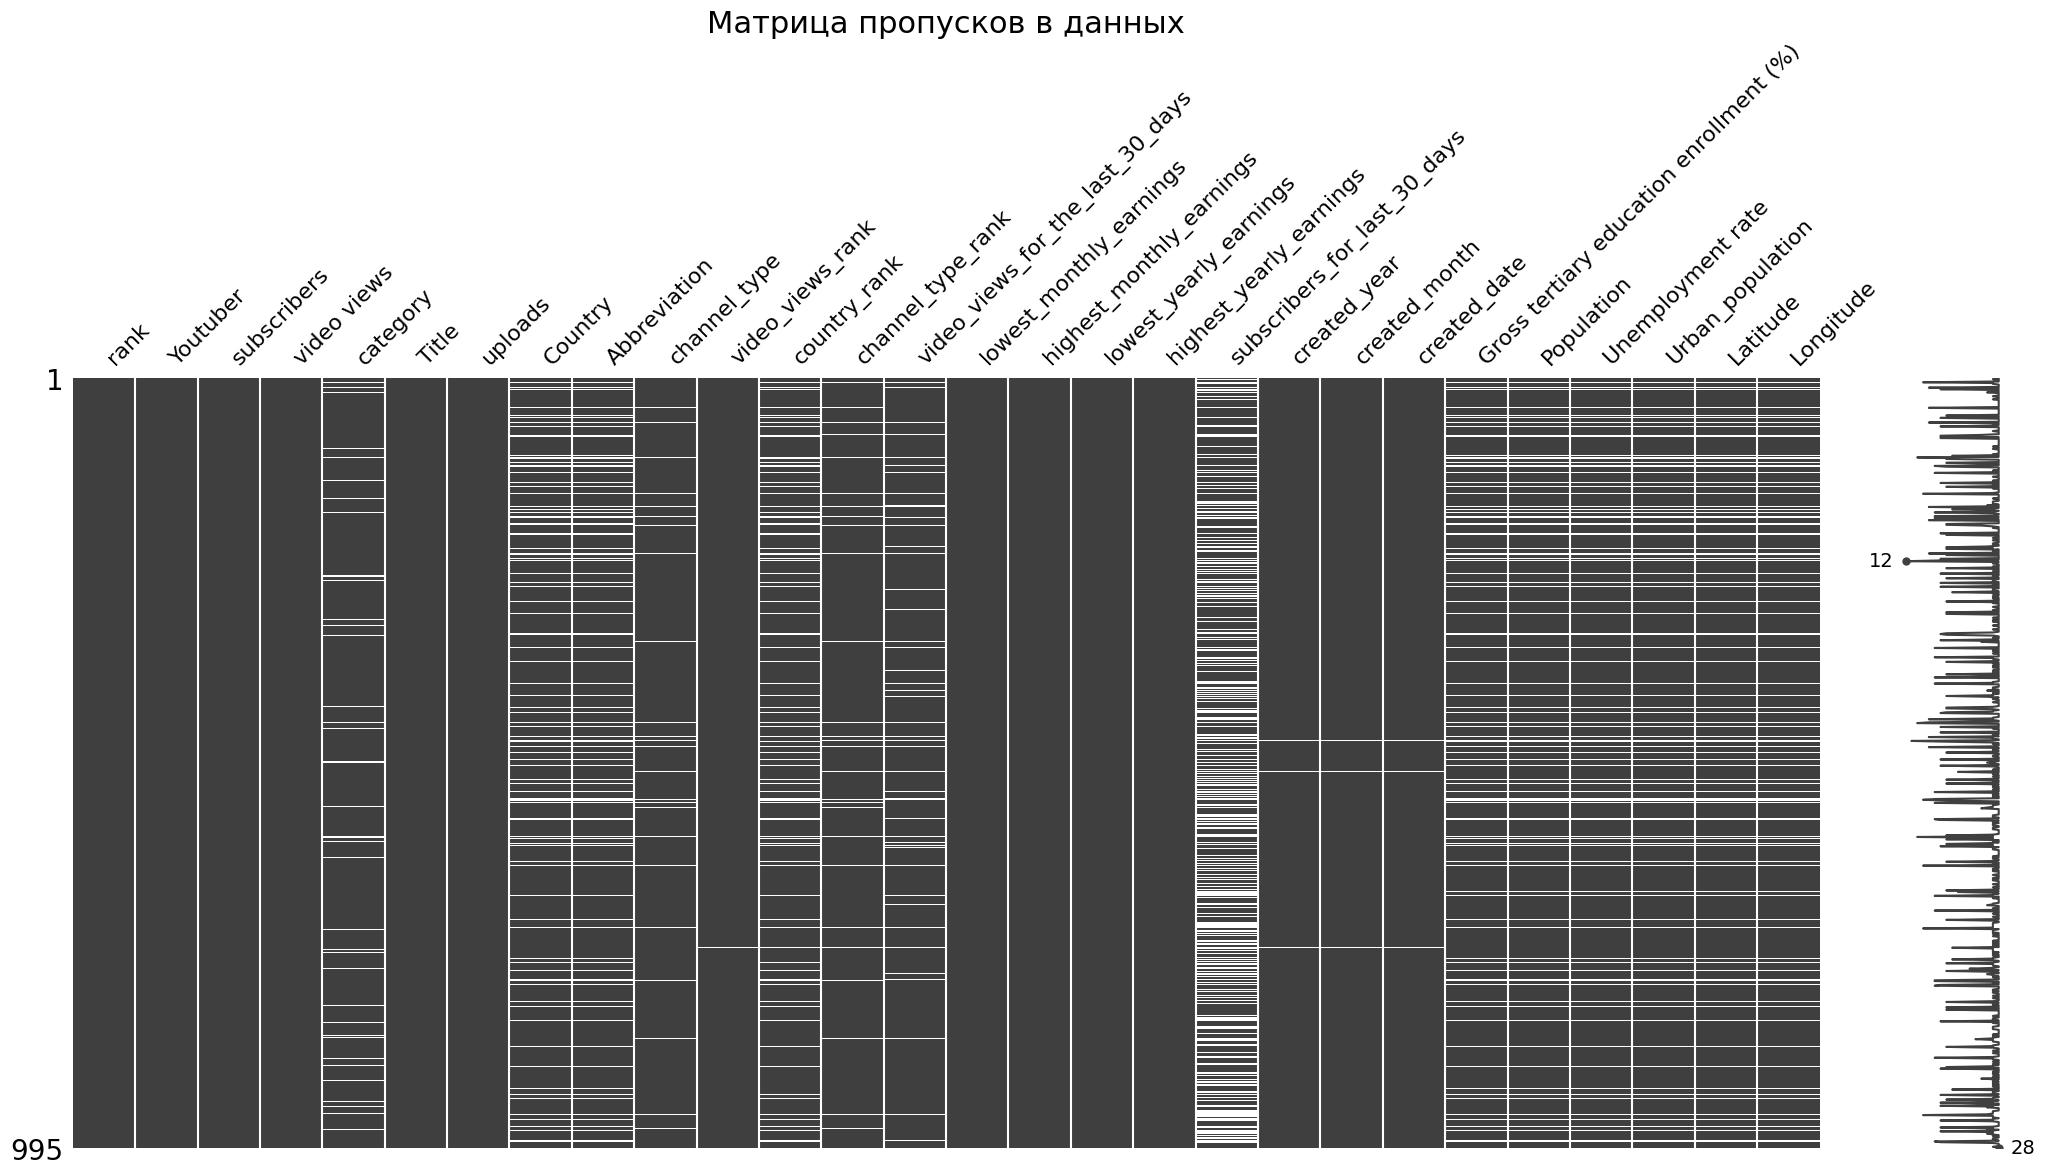

In [152]:
# Визуализируем пропуски
msno.matrix(df)
plt.title('Матрица пропусков в данных', fontsize = 22)
plt.show()

In [153]:
# Вывод строк с датой, чтобы обрести понимание, пропущены ли одинаковые строки или разные в created_year, created_month, created_date
df.loc[df['created_year'].isna()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
236,237,Chris Brown,25200000,"15,520,569,496",Music,ChrisBrown,0,NaN,NaN,NaN,"3,612,215",NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,469,Good Mythical Morning,18300000,"8,798,044,678",Entertainment,Goodmythicalmorning,0,NaN,NaN,NaN,"3,612,215","3,305",NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,509,The Game Theorists,17600000,"3,752,347,262",Gaming,TheGameTheorists,0,Australia,AU,NaN,"3,612,215","6,095",NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,113,"25,766,605",5,"21,844,756",-25,134
735,736,LEGENDA FUNK,14500000,"2,440,718,089",Music,LegendaFUNK,0,Brazil,BR,Music,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,51,"212,559,417",12,"183,241,641",-14,-52
762,763,Harry Styles,14400000,"5,689,224,452",People & Blogs,harrystyles,0,United States,US,Games,"4,037,956","7,574","7,340",NaN,0,0,0,0,NaN,NaN,NaN,NaN,88,"328,239,523",15,"270,663,028",37,-96


In [154]:
# Вывод строк с геопозицей, чтобы примерно понимать, в каких столюцах еще есть пропуски 
df.loc[df['Latitude'].isna()]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
5,6,Music,119000000,0,NaN,Music,0,NaN,NaN,Music,"4,057,944",NaN,NaN,NaN,0,0,0,0,NaN,"2,013",Sep,24,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0,NaN,Gaming,0,NaN,NaN,Games,"4,057,944",NaN,1,NaN,0,0,0,0,NaN,"2,013",Dec,15,NaN,NaN,NaN,NaN,NaN,NaN
14,15,Goldmines,86900000,"24,118,230,580",Film & Animation,goldmines,1,NaN,NaN,Music,"4,056,562",NaN,"5,663",18,0,0,0,1,NaN,"2,006",Aug,15,NaN,NaN,NaN,NaN,NaN,NaN
38,39,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,"32,312,431,239",Music,LooLoo Kids - Nursery Rhymes and Children's ï¿½,11,NaN,NaN,NaN,"3,800,129",NaN,NaN,159,0,1,0,8,NaN,"2,016",Nov,29,NaN,NaN,NaN,NaN,NaN,NaN
48,49,Badabun,46800000,"19,398,045,702",Entertainment,badabun,1,NaN,NaN,Music,"4,047,729",NaN,"5,525",440,0,2,1,21,75,"2,007",Jul,21,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,959,Troom Troom PT,12500000,"4,384,177,908",Howto & Style,Troom Troom PT,2738,NaN,NaN,Howto,"1,667",NaN,37,"13,501,000","3,400","54,000","40,500","648,100",NaN,"2,015",Apr,19,NaN,NaN,NaN,NaN,NaN,NaN
967,968,Troom Troom Indonesia,12500000,"5,379,684,248",People & Blogs,TROOM TROOM INDONESIA,8,NaN,NaN,People,"4,057,418",NaN,"7,712",1,0,0,0,0,NaN,"2,020",Jul,29,NaN,NaN,NaN,NaN,NaN,NaN
972,973,Hero Movies 2023,12400000,"1,689,090,619",People & Blogs,Hero Movies 2023,689,NaN,NaN,People,"6,116",NaN,63,"21,837,000","5,500","87,300","65,500","1,000,000",NaN,"2,017",Feb,22,NaN,NaN,NaN,NaN,NaN,NaN
985,986,TKOR,12400000,"3,392,022,527",Education,TKoR,0,NaN,NaN,People,"4,057,944",NaN,"7,741",NaN,0,0,0,0,NaN,"2,006",Aug,16,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
df.describe(include = ['object'])

,Youtuber,category,Title,Country,Abbreviation,channel_type,created_month
count,990,990,990,990,990,990,990
unique,990,19,987,50,50,15,12
top,T-Series,Entertainment,Preston,United States,US,Entertainment,Jan
freq,1,240,2,312,312,304,101


In [156]:
df.describe().round(2)

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995,995,995,995,994,879,962,939,995,995,995,995,658,990,990,872,872,872,872,872,872
mean,498,"22,982,412","11,039,537,052","9,187","554,249",386,746,"175,610,285","36,886","589,808","442,257","7,081,814","349,079","2,013",16,64,"430,387,267",9,"224,214,982",27,-14
std,287,"17,526,105","14,110,844,377","34,151","1,362,782","1,232","1,944","416,378,166","71,859","1,148,622","861,216","13,797,038","614,355",5,9,26,"472,794,722",5,"154,687,363",21,85
min,1,"12,300,000",0,0,1,1,1,1,0,0,0,0,1,"1,970",1,8,"202,506",1,"35,588",-38,-172
25%,250,"14,500,000","4,288,145,410",194,323,11,27,"20,137,500","2,700","43,500","32,650","521,750","100,000","2,009",8,36,"83,355,411",5,"55,908,316",21,-96
50%,498,"17,700,000","7,760,819,588",729,916,51,66,"64,085,000","13,300","212,700","159,500","2,600,000","200,000","2,013",16,68,"328,239,523",9,"270,663,028",37,-52
75%,746,"24,600,000","13,554,701,853","2,668","3,584",123,140,"168,826,500","37,900","606,800","455,100","7,300,000","400,000","2,016",23,88,"328,239,523",15,"270,663,028",37,79
max,995,"245,000,000","228,000,000,000","301,308","4,057,944","7,741","7,741","6,589,000,000","850,900","13,600,000","10,200,000","163,400,000","8,000,000","2,022",31,113,"1,397,715,000",15,"842,933,962",62,138


По описательной статистике можем сделать предварительный вывод о наших данных. Все они распределены, скорее всего, неравномерно. Опираясь на значения размаха, межквартильного размаха, разницами между минимумом и 1-м квартилем и максимум и 3-м квартилем, можно сказать, что у нас есть очень большой разброс по значениям данных и есть аномальные значения, скорее всего, это связано только с тем, что в данном датасете собраны каналы разного уровня - у кого-то хорошо развита аудитория и доход, а у кого-то совсем не развит канал (возможно, даже заброшен и им не пользуются).

In [157]:
# Корректировка пропусков
# Замена на Unknown пропуски в category, channel_type, Country и Abbreviation
df['category'] = df['category'].fillna('Unknown')
df['channel_type'] = df['channel_type'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')
df['Abbreviation'] = df['Abbreviation'].fillna('Unknown')

# Удаление строки с пропусками
df = df.dropna(subset=['video_views_rank', 'created_year', 'created_month', 'created_date'], axis = 0)

# Заполнение пропусков медианой
country_rank_median = df['country_rank'].median()
df['country_rank'] = df['country_rank'].fillna(country_rank_median)

channel_type_rank_median = df['channel_type_rank'].median()
df['channel_type_rank'] = df['channel_type_rank'].fillna(channel_type_rank_median)

video_views_median = df['video_views_for_the_last_30_days'].median()
df['video_views_for_the_last_30_days'] = df['video_views_for_the_last_30_days'].fillna(video_views_median)

#В ходе работы над столбцом subscribers_for_last_30_days были выявлены значимые изменения в статистике (считалась медиана по всему
# столбцу и по группам отдельно), вследствие чего было предпринято не изменять пропуски, т.к. иначе вставка\удаление могут повлечь сильные
# изменения в расчетах

education_median = df['Gross tertiary education enrollment (%)'].median()
df['Gross tertiary education enrollment (%)'] = df['Gross tertiary education enrollment (%)'].fillna(education_median)

population_median = df['Population'].median()
df['Population'] = df['Population'].fillna(population_median)

unemployment_median = df['Unemployment rate'].median()
df['Unemployment rate'] = df['Unemployment rate'].fillna(unemployment_median)

urban_population_median = df['Urban_population'].median()
df['Urban_population'] = df['Urban_population'].fillna(urban_population_median)

df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                     0
Title                                        0
uploads                                      0
Country                                      0
Abbreviation                                 0
channel_type                                 0
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               332
created_year                                 0
created_month                                0
created_date 

In [158]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,990,990,990,990,990,990,990,990,990,990,990,990,658,990,990,990,990,990,990,869,869
mean,498,"23,007,576","11,058,725,720","9,234","541,463",331,719,"169,865,043","37,072","592,787","444,491","7,117,581","349,079","2,013",16,64,"418,634,458",9,"230,090,849",27,-14
std,288,"17,564,537","14,139,993,991","34,231","1,350,513","1,124","1,909","406,249,765","71,992","1,150,755","862,815","13,822,655","614,355",5,9,24,"444,723,064",5,"145,799,017",20,85
min,1,"12,300,000",0,0,1,1,1,1,0,0,0,0,1,"1,970",1,8,"202,506",1,"35,588",-38,-172
25%,249,"14,500,000","4,302,739,336",200,315,14,28,"22,269,500","2,800","44,325","33,225","532,025","100,000","2,009",8,40,"126,014,024",5,"102,626,859",21,-96
50%,498,"17,700,000","7,761,448,300",737,912,50,65,"64,085,000","13,450","215,200","161,400","2,600,000","200,000","2,013",16,68,"328,239,523",9,"270,663,028",37,-52
75%,747,"24,600,000","13,558,777,871","2,723","3,497",113,137,"159,465,500","38,125","610,175","457,650","7,300,000","400,000","2,016",23,88,"328,239,523",15,"270,663,028",37,79
max,995,"245,000,000","228,000,000,000","301,308","4,057,944","7,741","7,741","6,589,000,000","850,900","13,600,000","10,200,000","163,400,000","8,000,000","2,022",31,113,"1,397,715,000",15,"842,933,962",62,138


Анализируем измененения описательной статистики после корректировки пропусков данных. 

video_views_rank - почти не изменились вычисления описательной статистики

country_rank_mode и channel_type_rank - мы заполняли медианой и после заполнения статистические вычисления также несильно изменились

video_views_for_the_last_30_days - заполняли медианой, в статистике незначительные изменения есть 

subscribers_for_last_30_days - после заполнения в 2 раза уменьшийлся 3-й квартиль, скорее всего это связано с тем, что заполнялась большое кол-во пропусков 

Gross tertiary education enrollment (%) - почти нет изменений в статистике

Population - после заполнения пропусков увеличился значимо min, скорее всего это связано с тем, что заполнялась большое кол-во пропусков 

Unemployment rate - без изменений после заполнения пропусков

Urban_population - после заполнения пропусков увеличился значимо min, скорее всего это связано с тем, что заполнялась большое кол-во пропусков

**Мои гипотезы к данному датасету:**
1) Контент из channel_type 'Animals' имеет больше просмотров, чем из категории 'People'
2) Есть ли связь между датой созданий канала и количеством подписчиков на канале, которые появились за последние 30 дней?
3) Больше всего контента в категории 'Science & Technology' производиться в США
4) У людей, которые проживают в стране, где процент образованности населения выше, контент собирает больше просмотров
5) Есть связь между количеством загруженных видео на канал и годовым доходом.
6) Каналы, созданные до 2015 года, в среднем имеют больше подписчиков, чем каналы, созданные в 2015 году или позже. 

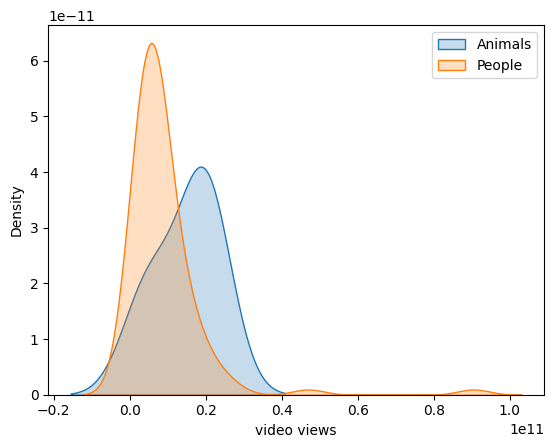

In [169]:
# 1) Контент из channel_type 'Animals' имеет больше просмотров, чем из категории 'People'
df_animal = df.loc[df['channel_type'] == 'Animals']['video views']
df_people = df.loc[df['channel_type'] == 'People']['video views']

sns.kdeplot(df_animal, label = 'Animals', fill = True)
sns.kdeplot(df_people, label = 'People', fill = True)
plt.legend()
plt.show()

Судя по графику, распределения сильно скошены. 
Также "Animals" имеют больше просмотров.
Проверим это на тестах

In [170]:
# Теста Манна-Уитни
stats_a, p_a = st.shapiro(df_animal)
stats_p, p_p = st.shapiro(df_people)

if p_a > 0.05 and p_p > 0.05:
    print('Вероятно, оба распределения нормальные')
else:
    print('Хотя бы одно из распределений не является нормальным')

Хотя бы одно из распределений не является нормальным


In [172]:
# В связи с тем, что у нас хотя бы одно из распределений ненормальное, используем для проверки гипотезы тест Манна-Уитни
stats, p = st.mannwhitneyu(df_animal, df_people, alternative = 'greater')


if p > 0.05:
    print('Контент в channel_type "Animals" имеет больше просмотров, чем "People"')
else:
    print('Нет оснований полагать, что видео в channel_type "Animals" имеют больше просмотров, чем "People"')

Контент в channel_type "Animals" имеет больше просмотров, чем "People"


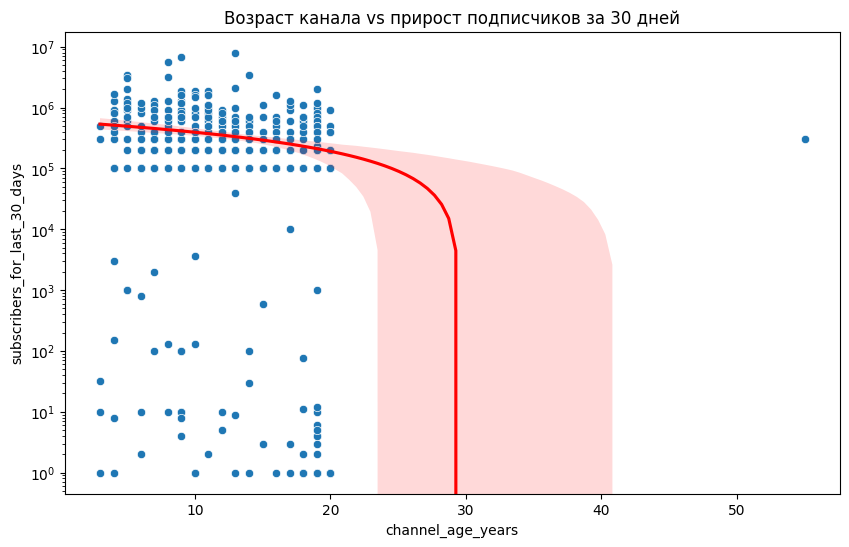

In [200]:
# 2) Есть ли связь между датой созданий канала и количеством подписчиков на канале, которые появились за последние 30 дней?
df['created_year'] = pd.to_numeric(df['created_year'])
current_year = datetime.now().year
df['channel_age_years'] = current_year - df['created_year']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='channel_age_years',
    y='subscribers_for_last_30_days',
)
sns.regplot(
    data=df,
    x='channel_age_years',
    y='subscribers_for_last_30_days',
    scatter=False,
    color='red' 
)
plt.yscale('log')
plt.title('Возраст канала vs прирост подписчиков за 30 дней')
plt.show()

Судя по графику, скорее всего связь между показателями есть, она нелинейная, очень слабая и отрицательная.
Проверка с помощью теста Спирмена

In [201]:
# Применяем тест Спирмена
data_clean = df[['channel_age_years', 'subscribers_for_last_30_days']].dropna()
stat, p = st.spearmanr(data_clean['channel_age_years'], data_clean['subscribers_for_last_30_days'])

if p > 0.05:
    print('Возраст канала никак не влияет на количество подписчиков, которые появились за последние 30 дней')
else:
    if stat > 0:
        print('Возраст канала положительно связан с количеством подписчиков, которые появились за последние 30 дней')
    else:
        print('Возраст канала отрицательно связан с количеством подписчиков, которые появились за последние 30 дней')

Возраст канала отрицательно связан с количеством подписчиков, которые появились за последние 30 дней


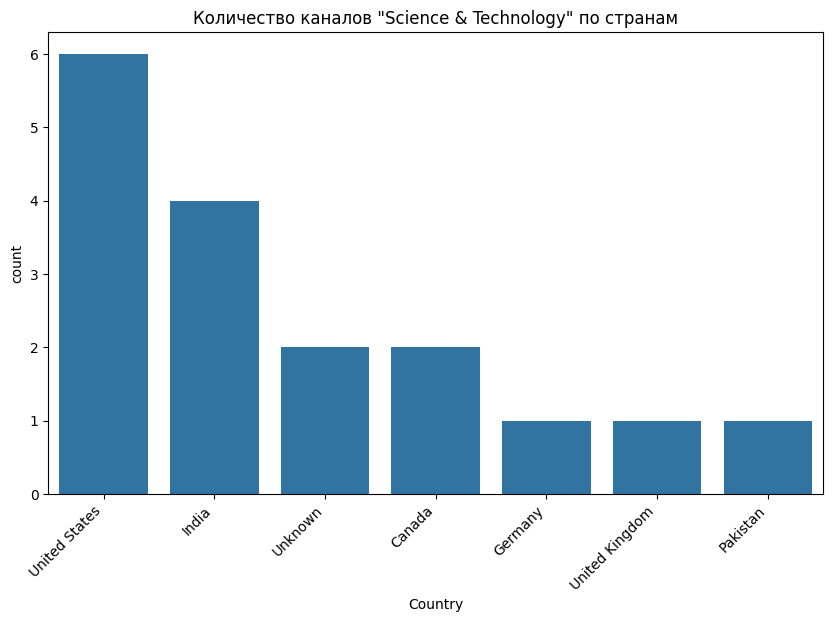

In [207]:
# 3) Больше всего контента в категории 'Science & Technology' производиться в США
df_science = df.loc[df['category'] == 'Science & Technology']

plt.figure(figsize=(10, 6))
sns.countplot(data=df_science, x='Country', order=df_science['Country'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Количество каналов "Science & Technology" по странам')
plt.show()

Судя по графику, в США вдействительности производят контента в категории 'Science & Technology' больше всего.

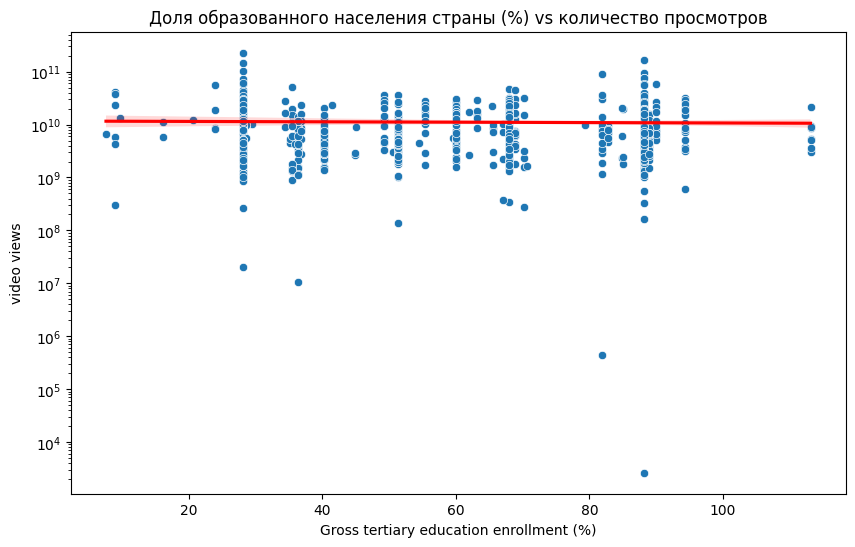

In [217]:
# 4) У людей, которые проживают в стране, где процент образованности населения выше, контент собирает больше просмотров
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Gross tertiary education enrollment (%)',
    y='video views',
)
sns.regplot(
    data=df,
    x='Gross tertiary education enrollment (%)',
    y='video views',
    scatter=False,
    color='red' 
)
plt.yscale('log')
plt.title('Доля образованного населения страны (%) vs количество просмотров')
plt.show()

Судя по графику, нет никакой зависимости между этими двумя показателями
Проверим тестами

In [219]:
# Выбираем для проверки тест Спирмана, т.к. нам нужно понять зависимость одной переменной от другой

stat, p = st.spearmanr(df['Gross tertiary education enrollment (%)'], df['video views'])

if p < 0.05:
    print('Есть связь между образованностью населения и количеством просмотров')
    if stat > 0:
        print("Направление: чем выше образованность — тем больше просмотров.")
    else:
        print("Направление: чем выше образованность — тем меньше просмотров.")
else:
    print('Нет никаких оснований полагать, что образованность населения и количество просмотров связаны')

Нет никаких оснований полагать, что образованность населения и количество просмотров связаны


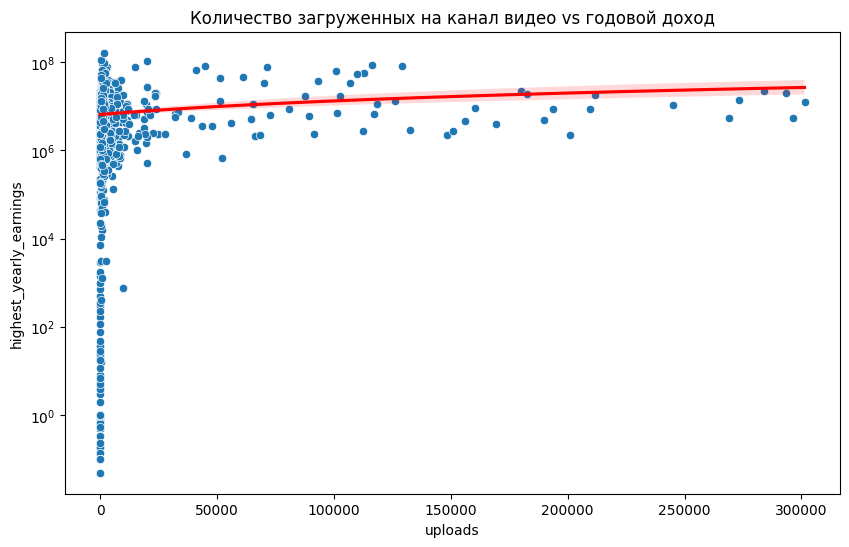

In [220]:
# 5) Есть связь между количеством загруженных видео на канал и годовым доходом.

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='uploads',
    y='highest_yearly_earnings',
)
sns.regplot(
    data=df,
    x='uploads',
    y='highest_yearly_earnings',
    scatter=False,
    color='red' 
)
plt.yscale('log')
plt.title('Количество загруженных на канал видео vs годовой доход')
plt.show()

Судя по графику, есть положительная связь между количеством загруженных на канал видео и годовым доходом 
Проверка тестом

In [221]:
# Проверяем тестом Спирмена, т.к. необходимо выявить корреляцию выборок
stat, p = st.spearmanr(df['uploads'], df['highest_yearly_earnings'])

if p < 0.05:
    print('Есть связь между количеством загруженных на канал видео и годовым доходом ')
    if stat > 0:
        print("Направление: чем больше видео — тем больше доход.")
    else:
        print("Направление: чем больше видео — тем меньше доход.")
else:
    print('Нет никаких оснований полагать, что загруженных на канал видео и годовой доход связаны')

Есть связь между количеством загруженных на канал видео и годовым доходом 
Направление: чем больше видео — тем больше доход.


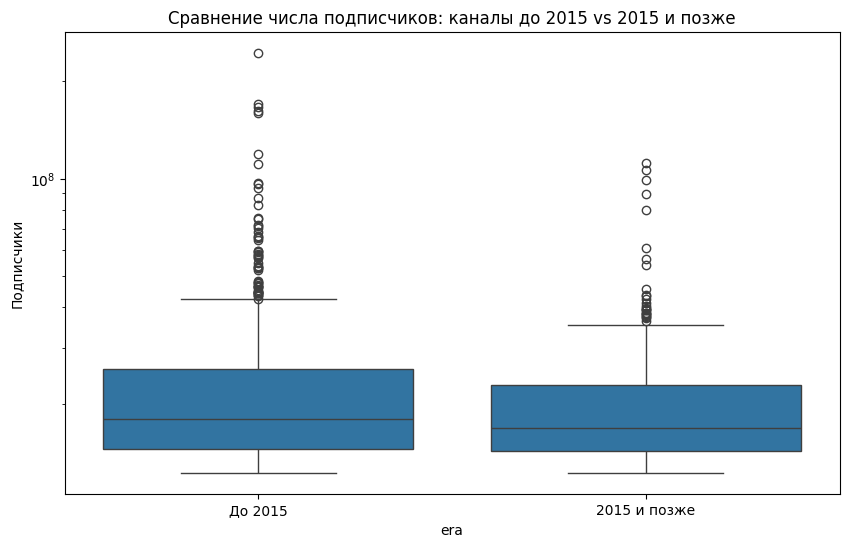

In [229]:
# Каналы, созданные до 2015 года, в среднем имеют больше подписчиков, чем каналы, созданные в 2015 году или позже. 
# Делим датасет до 2015 года и после 
df['era'] = df['created_year'].apply(lambda x: 'До 2015' if x < 2015 else '2015 и позже')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='era', y='subscribers')
plt.yscale('log')
plt.title('Сравнение числа подписчиков: каналы до 2015 vs 2015 и позже')
plt.ylabel('Подписчики')
plt.show()

Судя по графику, каналы, созданные до 2015 года, в среднем реально имеют больше подписчиков, тем те каналы, что были созданы позже.
Проверим с помощью теста

In [230]:
# Проверка распределения
old_channels = df[df['created_year'] < 2015]['subscribers'].dropna()
new_channels = df[df['created_year'] >= 2015]['subscribers'].dropna()

stat_old, p_old = st.shapiro(old_channels)
stat_new, p_new = st.shapiro(new_channels)

if p_old > 0.05 and p_new > 0.05:
    print('Распределения в обоих выборках являются нормальными')
else:
    print('Хотя бы одно распределение не является нормальным')

Хотя бы одно распределение не является нормальным


In [232]:
# Выбираем тест Манна-Уитини
stat, p = st.mannwhitneyu(old_channels, new_channels, alternative = 'greater')

if p < 0.05:
    print('Каналы, созданные до 2015 года в среднем имеют больше подписчиков, чем каналы, которые были созданы позже')
else:
    print('Нет разницы в количестве подписчиков в зависимости от года создания канала')

Каналы, созданные до 2015 года в среднем имеют больше подписчиков, чем каналы, которые были созданы позже


**Изобразите матрицу корреляций для нахождения взаимосвязей**

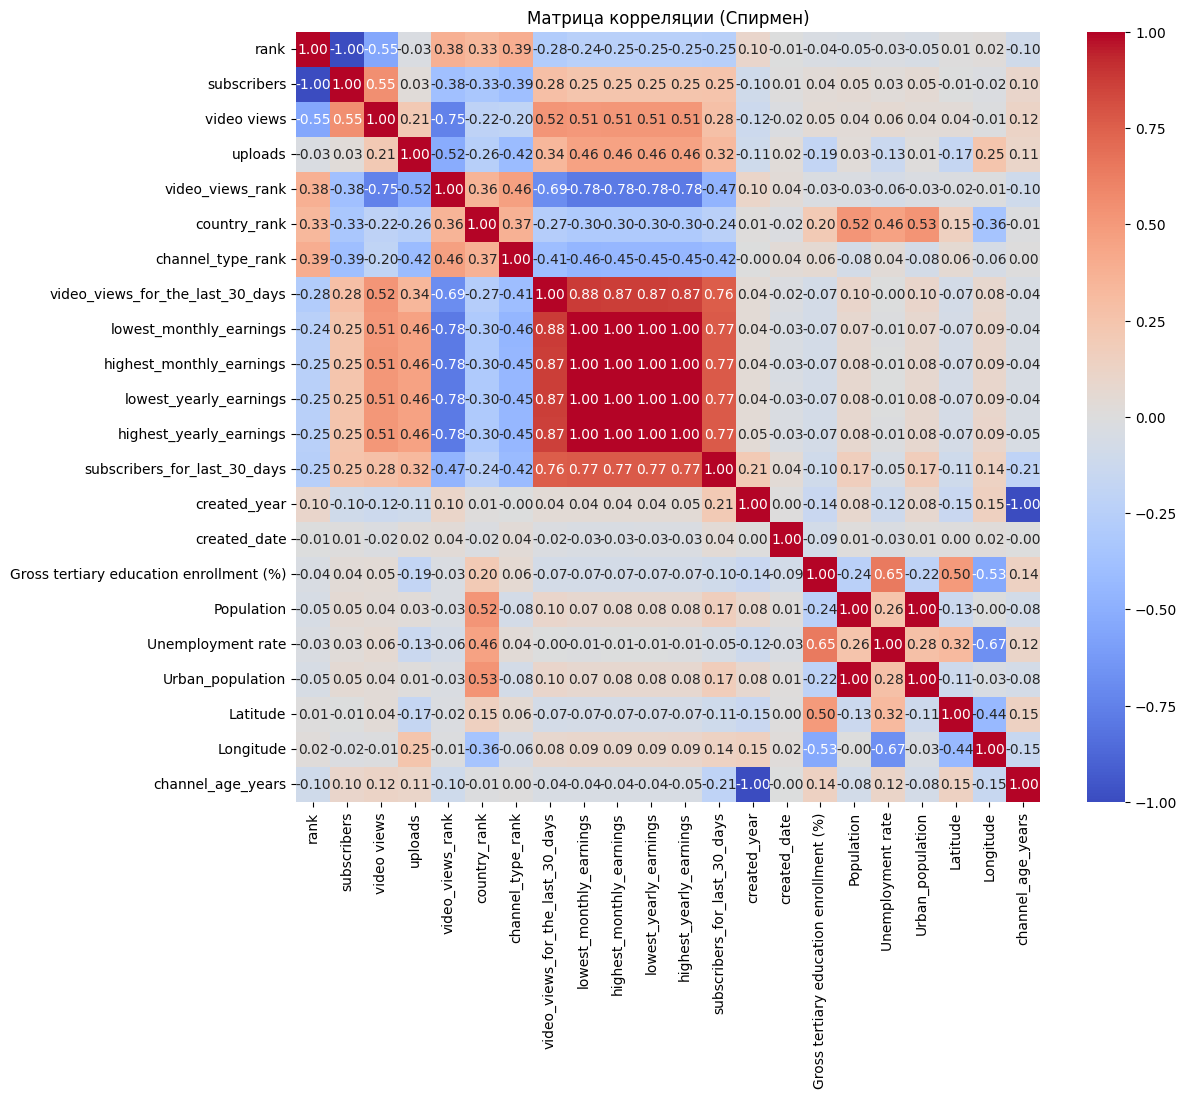

In [242]:
numeric_df = df.select_dtypes(include='number')

# Так как у нас большинство распределений ненормальные, большая часть данных имеет аномальные значения и ц нас есть 
# сного ранговых значений, выберем матрицу корреляции Спирмена
corr = numeric_df.corr(method='spearman')


plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Матрица корреляции (Спирмен)')
plt.show()

Самая сильная положительная монотонная связь по матрице корреляции между количеством просмотренных видео за последние 30 дней и всеми видами дохода - логично, что при росте просмотров будут расти доходы. 
Самая сильная оттрицательная монотонная связь по матрице карреляции между рангом канала по просмотрам и всеми видами доходов - чем выше ранг (т.е. чем меньше просмотров), тем меньше доходов получает канал.

**Задание 2. Корреляционный анализ**

1) Оставьте два коррелирующих столбца: "subscribers" и"video views".
2) Отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
3) Рассчитайте коэффициент корреляции Пирсона.
4) Определите "video views" как признак Х, а "subscribers" - как целевую переменную.
5) Разделите выборку на тестовую и тренировочную.
6) Постройте модель линейной регрессии.
7) Рассчитайте точность модели на тестовой выборке.

Как изменится точность, если опустить пункт 2 и не убирать из данных нулевые просмотры?

In [252]:
# Создаем новый датафрейм
df2 = df[['subscribers', 'video views']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990 entries, 0 to 994
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subscribers  990 non-null    int64  
 1   video views  990 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 55.5 KB


In [258]:
# Оставляем строки, где кол-во просмотов больше нуля
df3 = df2.loc[df['video views'] > 0]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 994
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subscribers  982 non-null    int64  
 1   video views  982 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 23.0 KB


In [260]:
# Рассчет коэффициента корреляции Пирсона
corr, p_value = st.pearsonr(df3['subscribers'], df3['video views'])

print(f'Коэффициент корреляции Пирсона: {round(corr, 2)}')

Коэффициент корреляции Пирсона: 0.82


In [266]:
# Разделение выборок для обучения 
x = df3[['video views']]
y = df3['subscribers']

In [267]:
# Делим выборку на тестовую и тренировочную
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [268]:
# Обучаем модель
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [277]:
# Делаем прогноз
predictions = lr.predict(x_test)

# Оцека модели с помощью коэффициента детерминации

r = lr.score(x_test, y_test)
r

0.6308750049333909

Коэффициент детерминации достаточно близко находится к 1, следовательно, модель построена качественно и точная

**Как изменится точность, если опустить пункт 2 и не убирать из данных нулевые просмотры?**

In [272]:
# Рассчет коэффициента корреляции Пирсона
corr, p_value = st.pearsonr(df2['subscribers'], df2['video views'])

print(f'Коэффициент корреляции Пирсона: {round(corr, 2)}')

Коэффициент корреляции Пирсона: 0.82


In [279]:
# Разделение выборок для обучения 
x_2 = df2[['video views']]
y_2 = df2['subscribers']

In [280]:
# Делим выборку на тестовую и тренировочную

x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, random_state = 42)

In [281]:
# Обучаем модель

lr_2 = LinearRegression()
lr_2.fit(x_2_train, y_2_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [285]:
# Делаем прогноз
predictions_2 = lr_2.predict(x_2_test)

# Оцека модели с помощью коэффициента детерминации

r2 = lr_2.score(x_2_test, y_2_test)
print(f'Коэффициет детерминации в первом случае (без нулей): {round(r, 2)}\n Коэффициет детерминации во втором случае: {round(r2, 2)}')

Коэффициет детерминации в первом случае (без нулей): 0.63
 Коэффициет детерминации во втором случае: 0.63


Коэффициент остался таким же, скорее всего из-за того, что значений с нулями не так много (судя по df2.info() и df3.info()) и они не оказывают значимого влияния на модель

**Задание 3. Классификация**

1) Определите две самые популярные категории канала и отфильтруйте по ним набор данных.
2) В качестве признаков используйте следующие столбцы: [‘video views’, ‘subscribers’, ‘uploads’]
3) Снова отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
4) Для целевой переменной используйте столбец'category'. Значения по нему закодируйте с помощью LabelEncoder.
5) Разделите выборку на тестовую и тренировочную, укажите random_state=13.`
6) Постройте модель логистической регрессии.
7) Рассчитайте точность модели на тестовой выборке.
   
Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?

In [312]:
# Определите две самые популярные категории канала и отфильтруйте по ним набор данных.
top_2_categories = df['category'].value_counts().index[:2]
print("Две самые популярные категории:", top_2_categories.tolist())

df_class = df[df['category'].isin(top_2_categories)].copy()

Две самые популярные категории: ['Entertainment', 'Music']


In [313]:
# Снова отфильтруйте данные - уберите те строки, где кол-во просмотров равно нулю.
df_class = df_class[df_class['video views'] != 0]

In [314]:
# Для целевой переменной используйте столбец'category'. Значения по нему закодируйте с помощью LabelEncoder.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_class['category'] = le.fit_transform(df_class['category'])

x = df_class[['video views', 'subscribers', 'uploads']]

y = df_class['category']

In [315]:
# Разделите выборку на тестовую и тренировочную, укажите random_state=13
# Указываем стратификацию, чтобы каждый класс по-ровну попали в тестовую и тренировочную выборки 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=13, stratify = y)

In [316]:
# Проводим масштабирование данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [317]:
# Постройте модель логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(random_state = 13)

# Обучаем модель
lr_model.fit(x_train, y_train)

# Делаем прогноз
lr_predictions = lr_model.predict(x_test)

print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           0       0.65      0.85      0.74        60
           1       0.73      0.47      0.57        51

    accuracy                           0.68       111
   macro avg       0.69      0.66      0.66       111
weighted avg       0.69      0.68      0.66       111



У нас получилось, что модель рассчатала и распределила по классам элементы выборок с высокой точностью - 0.65 и 0.73. При этом доля правильно определенных объектов была значительно выше в классе 0, чем в классе 1 - 0.85 и 0.45, соответственно. В целом accuracy достаточно высокая - 0.68, следовательно, модель построена хорошо.

**Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?**

In [326]:
# Выберем в качестве признаков ['Gross tertiary education enrollment (%)', 'Population', 'highest_monthly_earnings']
df_class = df_class.dropna(subset=['Gross tertiary education enrollment (%)', 'Population', 'highest_monthly_earnings'])

x_a = df_class[['Gross tertiary education enrollment (%)', 'Population', 'highest_monthly_earnings']]

y_a = df_class['category']

In [327]:
# Разделите выборку на тестовую и тренировочную, укажите random_state=13
# Указываем стратификацию, чтобы каждый класс по-ровну попали в тестовую и тренировочную выборки 
x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, random_state=13, stratify = y_a)

In [328]:
# Проводим масштабирование данных
scaler2 = StandardScaler()

x_a_train = scaler2.fit_transform(x_a_train)
x_a_test = scaler2.transform(x_a_test)

In [329]:
# Постройте модель логистической регрессии

lr_a_model = LogisticRegression(random_state = 13)

# Обучаем модель
lr_a_model.fit(x_a_train, y_a_train)

# Делаем прогноз
lr_a_predictions = lr_a_model.predict(x_a_test)

print(classification_report(y_a_test, lr_a_predictions))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58        54
           1       0.50      0.51      0.51        45

    accuracy                           0.55        99
   macro avg       0.54      0.54      0.54        99
weighted avg       0.55      0.55      0.55        99



При использовании столбцов ['Gross tertiary education enrollment (%)', 'Population', 'highest_monthly_earnings'] при исходной целевой переменной качество модели ухудшилось. Снизился процент точности определения наблюдений в обоих классах - с 0.65 до 0.58 в классе 0 и с 0.73 до 0.50 в классе 1. Доля правильно определенных объектов значительно снизилась с 0.85 до 0.57 в классе 0, в классе 1 немного увеличилась с 0.47 до 0.51, что говорит о том, что эта модель значительно хуже первой. Accuracy также снизился с 0.68 до 055. В целом accuracy не достаточно высокий, данная модель построена не очень хорошо и, возможно, ее следует переобучить.